# Assignment 1. Data Acquisition and Pandas Basics

## Introduction

In this assignment, we ask you to write python code to solve several problems. You will be provided with some bare code skeleton that you may use, but don't have to. Please populate this Jupyter notebook with your code and embeded results (outputs, figures, etc) and submit it on Canvas.


### Data

You will use three datasets.
1. NOAA Hanover Climate Data: https://www.ncdc.noaa.gov/cdo-web/
2. S&P 500, Dow Jones Industrial Average, Nasdaq Composite
3. Lending Club Loan Data from Kaggle (https://www.kaggle.com/wendykan/lending-club-loan-data)

### Useful libraries

- pandas
- matplotlib
- numpy
- [pandas-datareader](https://pandas-datareader.readthedocs.io/en/latest/)
- requests
- beautifulsoup
- feedparser (https://pypi.org/project/feedparser/)
- re


## Problem 1: Hanover Climate Data Basic Analysis

You need to implement functions to load the provided Hanover Climate Data CSV file in python, print out data summaries, and plot the data. 

### Q1: Load the CSV file (5 points)

The data file for this problem is NOAA_Hanover.csv. write a function to load the file to pandas dataframe and return the dataframe.

Note:
- The data type of the "DATE" column should be a Timestamp.
- Rows should be sorted by "DATE".

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
def load_hanover_climate_data(filename='./data/NOAA_Hanover.csv'):
    df = pd.read_csv(filename, parse_dates=["DATE"])
    df['DATE'] = pd.to_datetime(df['DATE'])
    df = df.sort_values(by='DATE')
    
    return df

load_hanover_climate_data()

/tmp/ipykernel_27841/3638218737.py:2: DtypeWarning: Columns (27,29,31,33,37,39,41) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filename, parse_dates=["DATE"])


,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,PRCP,PRCP_ATTRIBUTES,SNOW,SNOW_ATTRIBUTES,...,WT09,WT09_ATTRIBUTES,WT11,WT11_ATTRIBUTES,WT14,WT14_ATTRIBUTES,WT16,WT16_ATTRIBUTES,WT18,WT18_ATTRIBUTES
677,USC00273850,"HANOVER, NH US",43.7052,-72.2855,178.0,1884-11-01,2.8,",,6,",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
678,USC00273850,"HANOVER, NH US",43.7052,-72.2855,178.0,1884-11-02,0.0,"P,,6,",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
679,USC00273850,"HANOVER, NH US",43.7052,-72.2855,178.0,1884-11-03,0.0,"P,,6,",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
680,USC00273850,"HANOVER, NH US",43.7052,-72.2855,178.0,1884-11-04,14.2,",,6,",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
681,USC00273850,"HANOVER, NH US",43.7052,-72.2855,178.0,1884-11-05,12.2,",,6,",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48782,USC00273850,"HANOVER, NH US",43.7052,-72.2855,178.0,2018-02-07,10.9,",,H,1700",13.0,",,H,1700",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48783,USC00273850,"HANOVER, NH US",43.7052,-72.2855,178.0,2018-02-17,0.3,",,H,1700",0.0,",,H,1700",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48784,USC00273850,"HANOVER, NH US",43.7052,-72.2855,178.0,2018-02-18,9.7,",,H,1700",71.0,",,H,1700",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48785,USC00273850,"HANOVER, NH US",43.7052,-72.2855,178.0,2018-02-27,0.0,",,H,1700",0.0,",,H,1700",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Q2: Show the data (15 points)

Write python code in the following cell to:
- Print out all column names.
- Show the first 10 rows of the dataframe.
- Show the date range of the data.
- Print out the percentage of missing values for columns "TMIN", "TMAX", and "PRCP"?
- Find min, median, max, mean, and std of "TMIN", "TMAX", and "PRCP".

In [3]:
hanover_data = load_hanover_climate_data(filename='./data/NOAA_Hanover.csv')

# print out all column names
print("Column Names:")
print(hanover_data.columns)

# show the first 10 rows of the dataframe
print("\nFirst 10 Rows:")
print(hanover_data.head(10))

# show date range of the data
print("\nDate Range:")
print("Min Date:", hanover_data['DATE'].min())
print("Max Date:", hanover_data['DATE'].max())

# print out percentage of missing values for columns "TMIN", "TMAX", and "PRCP"
print("\nPercentage of Missing Values:")
for column in ["TMIN", "TMAX", "PRCP"]:
    missing_percentage = (hanover_data[column].isnull().sum() / len(hanover_data)) * 100
    print(f"{column}: {missing_percentage}%")

# find min, median, max, mean, and std of "TMIN", "TMAX", and "PRCP"
print("\nStatistics for 'TMIN', 'TMAX', and 'PRCP':")
for column in ["TMIN", "TMAX", "PRCP"]:
    print(f"{column}:")
    print("  Min:", hanover_data[column].min())
    print("  Median:", hanover_data[column].median())
    print("  Max:", hanover_data[column].max())
    print("  Mean:", hanover_data[column].mean())
    print("  Std:", hanover_data[column].std())
    print()


Column Names:
Index(['STATION', 'NAME', 'LATITUDE', 'LONGITUDE', 'ELEVATION', 'DATE', 'PRCP',
       'PRCP_ATTRIBUTES', 'SNOW', 'SNOW_ATTRIBUTES', 'SNWD', 'SNWD_ATTRIBUTES',
       'TMAX', 'TMAX_ATTRIBUTES', 'TMIN', 'TMIN_ATTRIBUTES', 'TOBS',
       'TOBS_ATTRIBUTES', 'WT01', 'WT01_ATTRIBUTES', 'WT03', 'WT03_ATTRIBUTES',
       'WT04', 'WT04_ATTRIBUTES', 'WT05', 'WT05_ATTRIBUTES', 'WT06',
       'WT06_ATTRIBUTES', 'WT07', 'WT07_ATTRIBUTES', 'WT08', 'WT08_ATTRIBUTES',
       'WT09', 'WT09_ATTRIBUTES', 'WT11', 'WT11_ATTRIBUTES', 'WT14',
       'WT14_ATTRIBUTES', 'WT16', 'WT16_ATTRIBUTES', 'WT18',
       'WT18_ATTRIBUTES'],
      dtype='object')

First 10 Rows:
         STATION            NAME  LATITUDE  LONGITUDE  ELEVATION       DATE  \
677  USC00273850  HANOVER, NH US   43.7052   -72.2855      178.0 1884-11-01   
678  USC00273850  HANOVER, NH US   43.7052   -72.2855      178.0 1884-11-02   
679  USC00273850  HANOVER, NH US   43.7052   -72.2855      178.0 1884-11-03   
680  USC00273850 

/tmp/ipykernel_27841/3638218737.py:2: DtypeWarning: Columns (27,29,31,33,37,39,41) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filename, parse_dates=["DATE"])


### Q3: Visualize the data (15 points)

Write a function to show a line plot of a given year's temperature and preciptation. The function should take three parameters: dataframe, year, and column name you are going to plot. Show months on the x-axis.

Hint: use pandas Timestamps to represent date.

- Pick a year, plot TMIN, TMAX in one plot, and PRCP in another plot.
- Make a plot to show the difference between TMAX and TMIN (i.e., TMAX-TMIN). Hint: you can modify the dataframe.

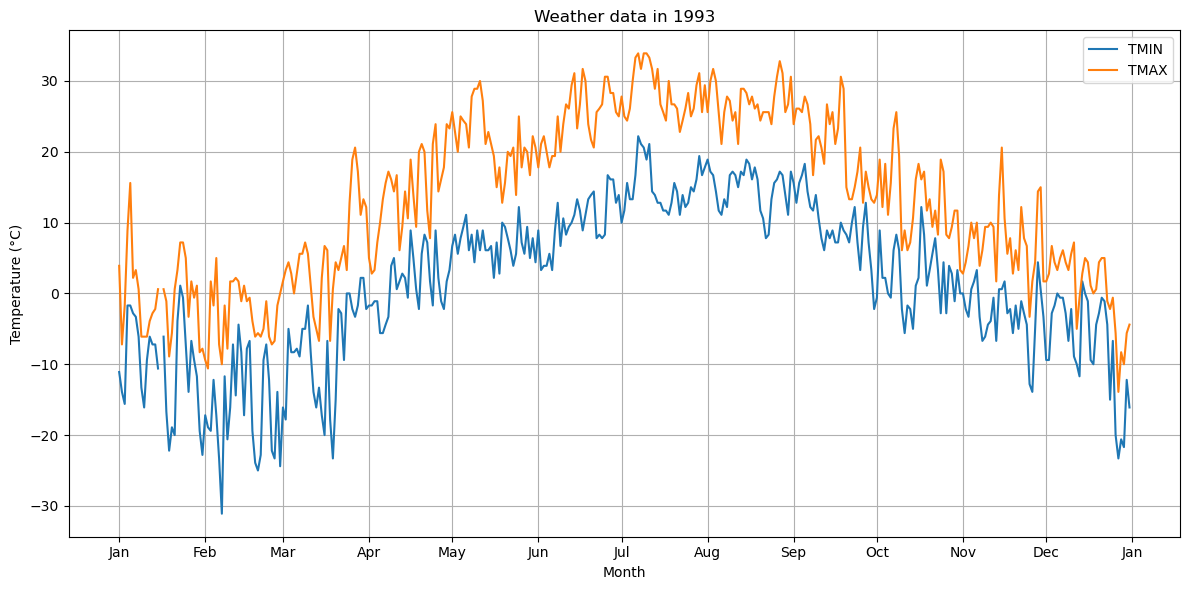

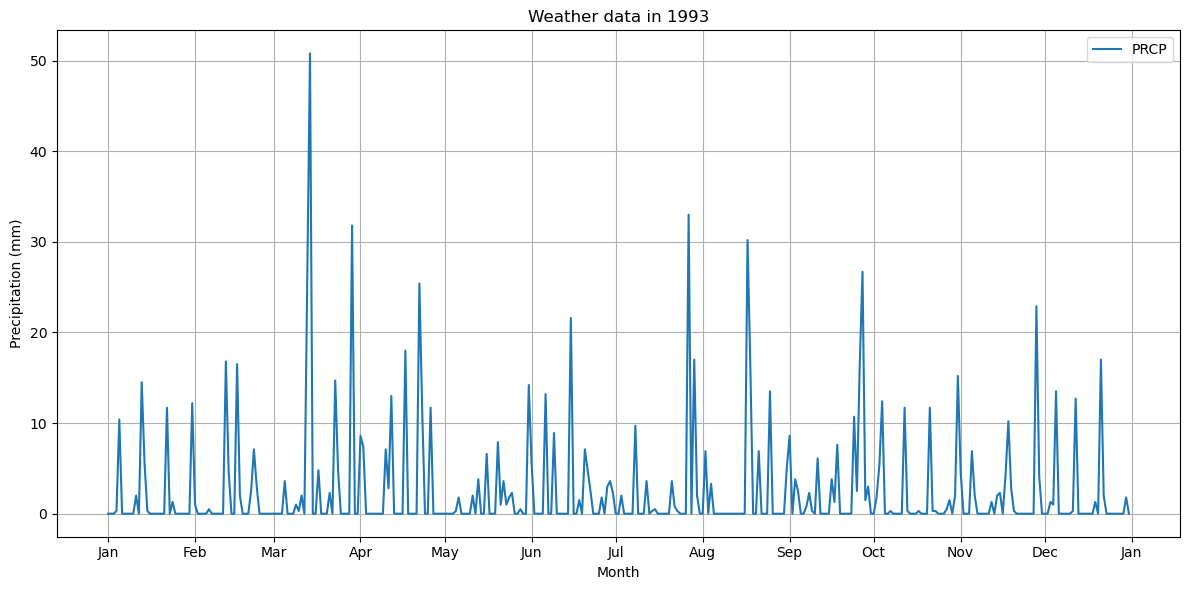

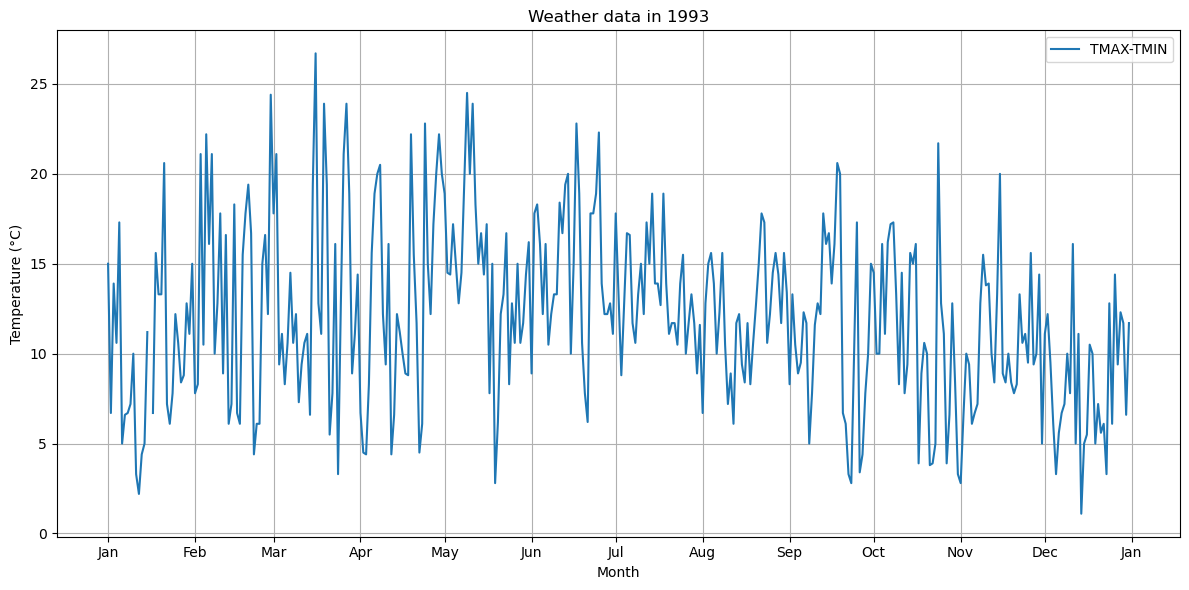

In [4]:
from pandas import Timestamp
import numpy as np
from datetime import datetime
import matplotlib.dates as mdates

def plot_weather_data(weather_data, year, column, y_label=''):
    # filter data by year
    data_curr_year = weather_data[weather_data['DATE'].dt.year == year]
    
    # sort values
    data_curr_year = data_curr_year.sort_values(by="DATE")
    
    # get data for plot
    x = data_curr_year['DATE'].tolist()
    y = data_curr_year[column].tolist()
    
    # plot
    plt.plot(x, y, label=column, linestyle='-')
    plt.title(f"Weather data in {year}")
    plt.xlabel("Month")
    plt.ylabel("y_label")
    
    # handle the x-axis month
    ax = plt.gca() # Get the current axis
    ax.xaxis.set_major_locator(mdates.MonthLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))

# pick a year
year = 1993

# plot TMIN and TMAX in one plot
plt.figure(figsize=(12, 6))
for col in ['TMIN', 'TMAX']:
    plot_weather_data(hanover_data, year, col, "Temperature (°C)")
plt.ylabel("Temperature (°C)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# plot PRCP
plt.figure(figsize=(12, 6))
col = 'PRCP'
plot_weather_data(hanover_data, year, col, "Precipitation (mm)")
plt.ylabel("Precipitation (mm)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# plot difference between TMAX and TMIN
plt.figure(figsize=(12, 6))
col = 'TMAX-TMIN'
hanover_data['TMAX-TMIN'] = hanover_data['TMAX'] - hanover_data['TMIN']
plot_weather_data(hanover_data, year, col, "Temperature difference (°C)")
plt.ylabel("Temperature (°C)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



## Problem 2: DJIA, S&P 500, and NASDAQ Correlation Analysis

Before you start working on this problem, install the pandas-datareader python library.

You will implement code to download DJIA, S&P 500, and NASDAQ from FRED (Federal Reserve Economic Data) and visualize the data from 2016-03-27 to 2019-03-27.

### Q1: Download the data (10 points)

Read pandas-datareader document at https://pydata.github.io/pandas-datareader/stable/remote_data.html#remote-data-fred to figure out how to use the API to download the data. Write your code to download the data.

In [5]:
# write your code here to load DJIA, SP500, NASDAQCOM from fred, show the top 10 head

import pandas_datareader.data as web
import datetime

# set start and end dates
start_date = datetime.datetime(2016, 3, 27)
end_date = datetime.datetime(2019, 3, 27)

# separate the data for use in part 2
djia_data = web.DataReader(['DJIA'], 'fred', start_date, end_date)
sp500_data = web.DataReader(['SP500'], 'fred', start_date, end_date)
nasdaq_data = web.DataReader(['NASDAQCOM'], 'fred', start_date, end_date)
data = web.DataReader(['DJIA', 'SP500', 'NASDAQCOM'], 'fred', start_date, end_date)

# djia_data.head(10), sp500_data.head(10), nasdaq_data.head(10)
data.head(10)

,DJIA,SP500,NASDAQCOM
DATE,,,
2016-03-28,17535.39,2037.05,4766.79
2016-03-29,17633.11,2055.01,4846.62
2016-03-30,17716.66,2063.95,4869.29
2016-03-31,17685.09,2059.74,4869.85
2016-04-01,17792.75,2072.78,4914.54
2016-04-04,17737.00,2066.13,4891.80
2016-04-05,17603.32,2045.17,4843.93
2016-04-06,17716.05,2066.66,4920.72
2016-04-07,17541.96,2041.91,4848.37


### Q2: Plot the data (5 points)

Make three line plots to show how Dow Jones Industrial Average, S&P 500, and NASDAQ change over time.

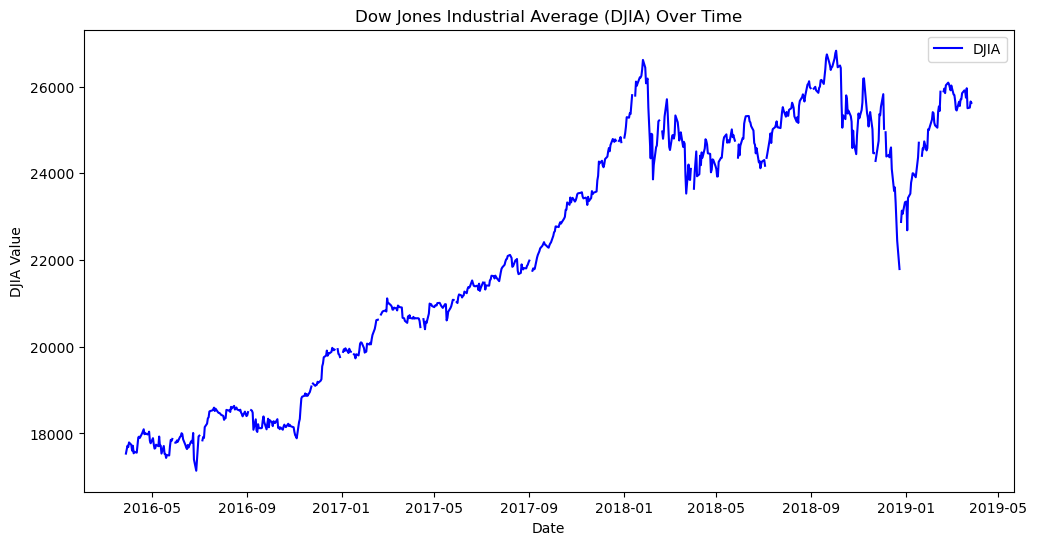

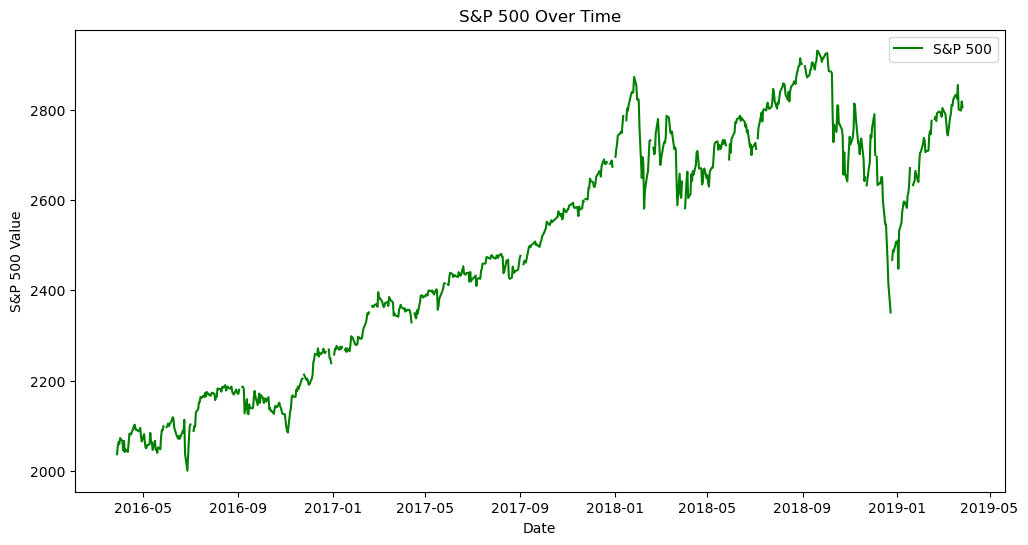

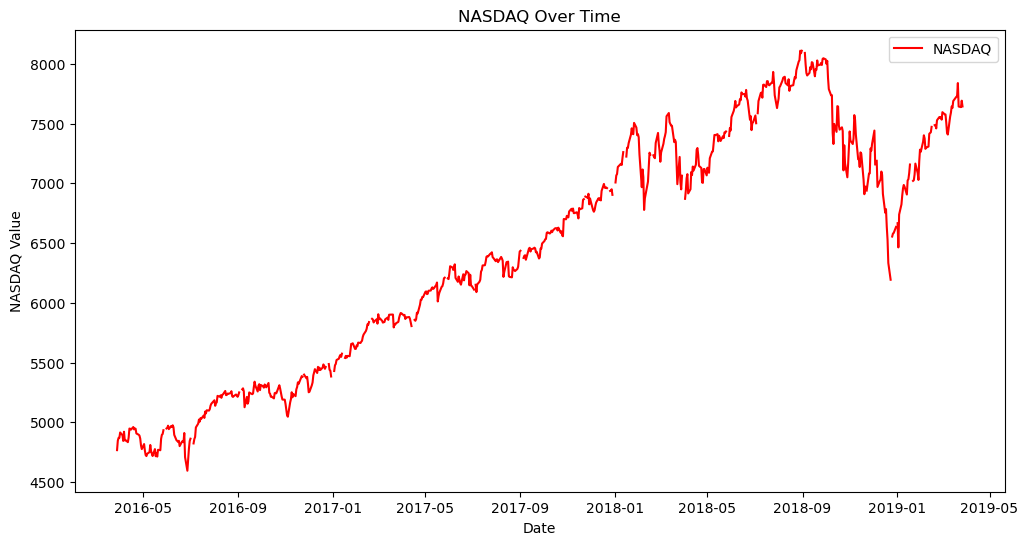

In [6]:
# write your code here
import matplotlib.pyplot as plt

# plot DJIA data
plt.figure(figsize=(12, 6))
plt.plot(djia_data.index, djia_data['DJIA'], label='DJIA', color='blue')
plt.title('Dow Jones Industrial Average (DJIA) Over Time')
plt.xlabel('Date')
plt.ylabel('DJIA Value')
plt.legend()
plt.show()

# plot S&P 500 data
plt.figure(figsize=(12, 6))
plt.plot(sp500_data.index, sp500_data['SP500'], label='S&P 500', color='green')
plt.title('S&P 500 Over Time')
plt.xlabel('Date')
plt.ylabel('S&P 500 Value')
plt.legend()
plt.show()

# plot NASDAQ data
plt.figure(figsize=(12, 6))
plt.plot(nasdaq_data.index, nasdaq_data['NASDAQCOM'], label='NASDAQ', color='red')
plt.title('NASDAQ Over Time')
plt.xlabel('Date')
plt.ylabel('NASDAQ Value')
plt.legend()
plt.show()

### Q3: Correlation (10 points)

The three composite indices look similar. Compute correlations to quantify how similar they are. 

**Hint**: Try to skip `NaN` values in the columns.

In [7]:
# compute correlations
data_3 = data.interpolate()
data_3.corr()


,DJIA,SP500,NASDAQCOM
DJIA,1.000000,0.993085,0.983616
SP500,0.993085,1.000000,0.994054
NASDAQCOM,0.983616,0.994054,1.000000


## Problem 3: Lending Club Loan Aggregation Analysis

The dataset for this problem is a large and high-dimentional dataset. We simplified the dataset to be used for this assignment.

### Q1: Unzip and Load Data (5 points)

The dataset for this assignment is in ./data/loan.csv.zip. You need to unzip the file first. Though not required, we recommend you use the python "zipfile" library to unzip it. Make sure the unzipped file lives in the `"./data/"` folder. Load the csv file into a dataframe. 

In [8]:
import os
import pandas as pd
import zipfile

def load_loan(filename='./data/loan.csv'):
    df = pd.read_csv(filename,delimiter=',')
    return df

loan_data = load_loan(filename='./data/loan.csv')

/tmp/ipykernel_27841/3729971722.py:6: DtypeWarning: Columns (19,55) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filename,delimiter=',')


### Q2: Indexing (10 points)

There are about 70+ columns and about 870,000 rows in the dataset. However, not all of them are interesting to us. Also, note that some values may be missing or have further errors. We need select some of rows and columns as a subset for further mining.

First, extract the following columns: `'loan_amnt'`, `'term'`, `'int_rate'`, `'grade'`, `'issue_d'`, `'addr_state'`, `'loan_status'`. Show the top 10 head of this subdataset. 

Next, examin the `'loan_status'` column. There are several possible distinct values this column can take. Count the number of records for each status. Print out your result.

In [9]:
# extract the listed coumns
selected_columns = ['loan_amnt', 'term', 'int_rate', 'grade', 'issue_d', 'addr_state', 'loan_status']
subdataset = loan_data[selected_columns]

# show top 10 head of subdataset
print("Top 10 rows of the subdataset:")
print(subdataset.head(10))

# count number of records for each status in loan status 
loan_status_counts = subdataset['loan_status'].value_counts()

# print result
print("\nCount of records for each loan status:")
print(loan_status_counts)


Top 10 rows of the subdataset:
   loan_amnt        term  int_rate grade   issue_d addr_state  loan_status
0     5000.0   36 months     10.65     B  Dec-2011         AZ   Fully Paid
1     2500.0   60 months     15.27     C  Dec-2011         GA  Charged Off
2     2400.0   36 months     15.96     C  Dec-2011         IL   Fully Paid
3    10000.0   36 months     13.49     C  Dec-2011         CA   Fully Paid
4     3000.0   60 months     12.69     B  Dec-2011         OR      Current
5     5000.0   36 months      7.90     A  Dec-2011         AZ   Fully Paid
6     7000.0   60 months     15.96     C  Dec-2011         NC      Current
7     3000.0   36 months     18.64     E  Dec-2011         CA   Fully Paid
8     5600.0   60 months     21.28     F  Dec-2011         CA  Charged Off
9     5375.0   60 months     12.69     B  Dec-2011         TX  Charged Off

Count of records for each loan status:
loan_status
Current                                                601779
Fully Paid                    

### Q3: Data Aggregation with Group Operations (10 points)

Your next step involves grouping data. Here, we would like to know the amount of loan by month. In other words, we'd like to see something like:

|   issue_m  |    loan_amnt    |
| ---------- | -----------|
|     2007-06   |   91850.0  |
|     2007-07   |  348325.0  |



Group the records according to month. Sum all the loans in each month and **print out top ten lines of the result**.

**Hint**: use `groupby`

In [10]:
import pandas as pd

# convert 'issue_d' column to datetime
subdataset['issue_d'] = pd.to_datetime(subdataset['issue_d'])

# group by month and sum all loans
monthly_loan_sum = subdataset.groupby(subdataset['issue_d'].dt.to_period("M"))['loan_amnt'].sum()

# print top 10 lines of result
print("Top 10 lines of loan amount by month:")
print(monthly_loan_sum.head(10))



Top 10 lines of loan amount by month:
issue_d
2007-06      91850.0
2007-07     348325.0
2007-08     515300.0
2007-09     372950.0
2007-10     753225.0
2007-11    1008650.0
2007-12    1887175.0
2008-01    2926000.0
2008-02    2959225.0
2008-03    4150050.0
Freq: M, Name: loan_amnt, dtype: float64


/tmp/ipykernel_27841/2609925574.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  subdataset['issue_d'] = pd.to_datetime(subdataset['issue_d'])
/tmp/ipykernel_27841/2609925574.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subdataset['issue_d'] = pd.to_datetime(subdataset['issue_d'])


## Problem 4: News Articles

### Q1 (20 points)

Use the feedparser library (you can download it here: https://pypi.org/project/feedparser/) to extract the text from the top 3 stories from the CNN and Fox news RSS links provided below. Note that you should only be capturing the text, no html content should be captured. Print the first 10 words of each story. Save these 6 stories as you will be using them later on in this assignment.
<br>
CNN: http://rss.cnn.com/rss/cnn_latest.rss
<br>
Fox: http://feeds.foxnews.com/foxnews/latest

In [11]:
from bs4 import BeautifulSoup
import feedparser
from urllib.request import urlopen
import pprint
import nltk

def get_articles(rss_feed):
    # list to store articles
    total_articles = []
    for feed in rss_feed:
        #list to store rss articles
        rss_articles = []
        # parse feed
        parsed_feed = feedparser.parse(feed)
        # for first 3
        for i in range(0,3):
            # perform analysis on the summary field
            result = parsed_feed.entries[i].summary
            rss_articles.append(result)
        total_articles.append(rss_articles)
    return total_articles

# input url
ls = get_articles(['http://rss.cnn.com/rss/cnn_latest.rss','https://moxie.foxnews.com/google-publisher/latest.xml'])

# get the first 10 words
top_cnn = [summary.split()[:10]for summary in ls[0]]
top_fox = [summary.split()[:10]for summary in ls[1]]

print(top_cnn,top_fox)


[['The', 'president', 'of', 'a', 'Detroit', 'synagogue', 'board', 'was', 'found', 'dead'], ['In', 'the', 'days', 'since', 'a', 'blast', 'ripped', 'through', 'the', 'packed'], ['A', 'judge', 'has', 'rejected', 'three', 'more', 'attempts', 'by', 'former', 'President']] [['For', 'the', 'first', 'time', 'in', 'four', 'years,', 'the', 'Air', 'Force'], ['Linda', 'Evangelista', 'spoke', 'out', 'against', 'the', 'use', 'of', 'filters', 'and'], ['A', 'man', 'in', 'Poland', 'was', 'arrested', 'after', 'he', 'pretended', 'to']]


### Q2 (20 points)
Take the 6 news articles from Q1 and do the following to each one:
(1) Tokenize (i.e., create a list of words)
(2) Clean the words by lowercasing, removing words smaller than 3 characters and removing non-alphanumeric charactercters
(3) Save each these 6 cleaned articles as you will be using them later in the assignment.
(4) Write a function to extract the top K most used words in a given tokenized article (i.e., represented as a list of words)


In [12]:
import nltk
from nltk import FreqDist
nltk.download('punkt')

def clean_article(article):
    # (1) tokenize
    tokenized = nltk.word_tokenize(article)
    # (2) lowercasing, removing words smaller than 3 characters and removing non-alphanumeric charactercters
    cleaned = [word.lower() for word in tokenized if len(word) > 2 and word.isalnum()]
    return cleaned

# tokenize and clean cnn and fox articles
# (3) save each these 6 cleaned articles
clean_cnn = [clean_article(summary) for summary in ls[0]]
clean_fox = [clean_article(summary) for summary in ls[1]]
clean_all = clean_cnn + clean_fox

print(clean_all)

def extract_top_K_words(article,top_K):
    # (4) extract top K most used words in a given tokenized article
    top_K_words = FreqDist(nltk.word_tokenize(article)).most_common(top_K)
    return top_K_words


[['the', 'president', 'detroit', 'synagogue', 'board', 'was', 'found', 'dead', 'saturday', 'morning', 'with', 'multiple', 'stab', 'wounds', 'outside', 'her', 'home', 'police', 'said'], ['the', 'days', 'since', 'blast', 'ripped', 'through', 'the', 'packed', 'hospital', 'gaza', 'city', 'killing', 'hundreds', 'palestinians', 'dueling', 'claims', 'between', 'palestinian', 'militants', 'and', 'the', 'israeli', 'government', 'over', 'culpability', 'are', 'still', 'raging', 'but', 'forensic', 'analysis', 'publicly', 'available', 'imagery', 'and', 'footage', 'has', 'begun', 'offer', 'some', 'clues', 'what', 'caused', 'the', 'explosion'], ['judge', 'has', 'rejected', 'three', 'more', 'attempts', 'former', 'president', 'donald', 'trump', 'and', 'the', 'colorado', 'gop', 'shut', 'down', 'lawsuit', 'seeking', 'block', 'him', 'from', 'the', '2024', 'presidential', 'ballot', 'the', 'state', 'based', 'the', '14th', 'amendment', 'insurrectionist', 'ban'], ['for', 'the', 'first', 'time', 'four', 'years

[nltk_data] Downloading package punkt to /Users/ivoryang/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


### Q3 (5 points)

Create a dataframe where the rows correspond to the six articles (you can use the first 5 words of the articles as their name) and the columns correspond to the top 20 words extracted in Q2. The cells should correspond to the count of each of these words in the article. Print the dataframe.

In [13]:
import pandas as pd
from collections import Counter

def six_twenty_dataframe(clean):
    # initialize string variable with a space character
    empty = ' '
    # joins each article within the clean list into a single string, separating words with spaces
    combined_clean = [' '.join(summary) for summary in clean]
    for i in range(len(combined_clean)):
        empty = ' '.join([empty, combined_clean[i]])
        # extract the top 20 words
        words = extract_top_K_words(empty,20)
    df = pd.DataFrame()
    # initialize a current variable to keep track of articles being processed
    current = 0
    
    for article in clean:
        # creates a list row with the first five words of the current article joined together with spaces
        row = [(' '.join(article[:5]))]
        # use the Counter class to count the occurrences of each word in the current article
        count = Counter(article)
        for word in np.array(words)[:,0]:
            row.append(count[word])
        df[current] = row
        current += 1
        
    df = df.T
    df = df.set_axis(df[0], axis='index')
    df = df.drop(0,axis=1)
    columns = list(np.array(words)[:,0])
    df.columns = columns
    return df

df = six_twenty_dataframe(clean_all)
df

,the,and,has,after,president,was,saturday,over,are,still,from,store,detroit,synagogue,board,found,dead,morning,with,multiple
0,,,,,,,,,,,,,,,,,,,,
the president detroit synagogue board,1,0,0,0,1,1,1,0,0,0,0,0,1,1,1,1,1,1,1,1
the days since blast ripped,4,2,1,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0
judge has rejected three more,4,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
for the first time four,3,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0
linda evangelista spoke out against,3,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
man poland was arrested after,2,0,0,2,0,1,0,0,0,0,1,2,0,0,0,0,0,0,0,0


### Q4 (10 points)

Each row in the dataframe generated in Q3 is basically a vector representation of that article. Find the similarity between the articles by measuring the distance between the vectors representing each article. Please use the cosine similarity as your similarity metric. You can use the NLTk implementation here: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise.cosine_similarity.html . We will go over different metrics later in the class, for now just know that cosine similairty is one way to measure distance/similarity between vectors (another way being eucilidean distance which everyone should be familiar with).

Create a 6x6 dataframe where the rows and columns correspond to the articles and the cells show the similarity between each article.

HINT:
HERE IS HOW YOU USE THE COSINE_SIMILARITY FUNCTION:
<br>
x=[1,2,3]
<br>
y=[2,1,1]
<br>
cosine_similarity([x],[y])



In [14]:
from sklearn.metrics.pairwise import cosine_similarity

# numerical input does not matter - just used to populate
similarity_dataframe = pd.DataFrame([1,2,3,4,5,6])
similarity_dataframe.index = df.index

for j in range(0,6):
    vals = []
    for i in range(0,6):
        vals.append(cosine_similarity([df.iloc[j].to_numpy()],[df.iloc[i].to_numpy()]))
    similarity_dataframe[j] = vals
    
similarity_dataframe.columns = df.index
similarity_dataframe

,the president detroit synagogue board,the days since blast ripped,judge has rejected three more,for the first time four,linda evangelista spoke out against,man poland was arrested after
0,,,,,,
the president detroit synagogue board,[[1.0000000000000002]],[[0.2357022603955159]],[[0.32274861218395146]],[[0.3333333333333334]],[[0.24019223070763074]],[[0.2314550249431379]]
the days since blast ripped,[[0.2357022603955159]],[[1.0000000000000002]],[[0.8672273827165131]],[[0.8249579113843055]],[[0.9058216273156767]],[[0.43643578047198484]]
judge has rejected three more,[[0.32274861218395146]],[[0.8672273827165131]],[[1.0]],[[0.7745966692414834]],[[0.8682431421244593]],[[0.5378528742004771]]
for the first time four,[[0.3333333333333334]],[[0.8249579113843055]],[[0.7745966692414834]],[[1.0000000000000002]],[[0.7205766921228922]],[[0.46291004988627577]]
linda evangelista spoke out against,[[0.24019223070763074]],[[0.9058216273156767]],[[0.8682431421244593]],[[0.7205766921228922]],[[1.0000000000000002]],[[0.592999453328881]]
man poland was arrested after,[[0.2314550249431379]],[[0.43643578047198484]],[[0.5378528742004771]],[[0.46291004988627577]],[[0.592999453328881]],[[1.0000000000000002]]


## Problem 5: Web Scraping

### Q1 (30 points)

Use your web scraping knowledge to extract the first page comments from the following forum page: "https://www.vgr.com/forum/topic/8467-racing-wheels/"
You should extract the text, username, time of the posts, and the points of the users.
<br>
Create a dataframe with one column corresponding to the "text", and two columns corresponding to the usernam and points. The time of the posts should be converted to a pandas timestamp and used as the index of the datafame.

In [15]:
# url = "https://travel.stackexchange.com/questions/69053/how-to-avoid-toddlers-on-a-long-distance-plane-flight"

import requests
from bs4 import BeautifulSoup

url = "https://travel.stackexchange.com/questions/69053/how-to-avoid-toddlers-on-a-long-distance-plane-flight"
page = requests.get(url)
soup = BeautifulSoup(page.content)
texts = soup.findAll(class_ = "s-prose js-post-body")
cleaned_text = [text.get_text(" ").replace("\n", "") for text in texts]
users = soup.findAll(class_ = 'user-info')

# initialize three lists to store times, usernames, and points
times = []
usernames = []
points = []

for user in users:
    # if a user has edited as their first activity
    edited = user.find(class_ = "user-action-time").get_text(" ")
    # they are excluded from the data
    if edited.split()[0] == 'edited':
        continue
        
    user_dets = user.find(class_ = "user-details")
    # get username of user
    username = user_dets.find('a').get_text(" ")
    usernames.append(username)
    
    # get time of post
    time = user.find(class_ = "relativetime")['title']
    times.append(time)
    
    # get points of user
    point = user.find(class_ = "reputation-score").get_text(" ")
    points.append(point)
    
# set up new dataframe   
wsdf = pd.DataFrame({
                "usernames":usernames,
                "points":points,
                'text':cleaned_text},index = times)

# time of posts, convert to pandas timestamp and use as index
wsdf.index = pd.to_datetime(wsdf.index)
wsdf
    

,usernames,points,text
2016-05-26 23:02:16+00:00,Silver Dragon,973,I have recently taken a London - San Francisc...
2016-05-27 00:32:26+00:00,Kate Gregory,79.8k,"To avoid disturbance from small children, you..."
2016-05-26 23:13:58+00:00,Berwyn,28.4k,"For $160,000 , you can hire a private jet fo..."
2016-05-27 03:17:41+00:00,Dancrumb,"1,585",Toddlers cannot be seated in exit rows. If y...
2016-05-27 10:25:31+00:00,JonathanReez,82.3k,"Assuming you fly with a second person, you co..."
2016-05-28 05:31:04+00:00,Fabio Beltramini,751,"Bring $20 - $50 cash. After you board, if you..."
2016-05-27 09:48:10+00:00,Andrew Grimm,22.9k,"Rather than using earplugs, get some headphon..."
2016-05-27 18:54:31+00:00,Adam Davis,"2,064","While long haul, no layover flights may seem ..."
2016-05-26 23:51:27+00:00,Count Iblis,"2,608",You may avoid such problems if you travel fir...
2016-05-27 17:01:59+00:00,cspirou,574,Judging from your description it seems like y...


### Q2 (10 points)
Resample the dataframe above to create 2 new frames as follows:
(1) Resampled by day
(2) Resampled by month



In [16]:
# resampled by day
wsdf_day = wsdf.resample('D').sum()

# resampled by month
wsdf_month = wsdf.resample('M').sum()

print("Resampled by day:")
print(wsdf_day.head())

print("\nResampled by month:")
print(wsdf_month.head())

Resampled by day:
                                                                   usernames  \
2016-05-26 00:00:00+00:00                     Silver DragonBerwynCount Iblis   
2016-05-27 00:00:00+00:00  Kate GregoryDancrumbAndrew GrimmJonathanReezcs...   
2016-05-28 00:00:00+00:00                              Fabio BeltraminiDante   

                                                 points  \
2016-05-26 00:00:00+00:00                 97328.4k2,608   
2016-05-27 00:00:00+00:00  79.8k1,58522.9k82.3k5742,064   
2016-05-28 00:00:00+00:00                        751161   

                                                                        text  
2016-05-26 00:00:00+00:00   I have recently taken a London - San Francisc...  
2016-05-27 00:00:00+00:00   To avoid disturbance from small children, you...  
2016-05-28 00:00:00+00:00   Bring $20 - $50 cash. After you board, if you...  

Resampled by month:
                                                                   usernames  \
2016-05

### Q3 (20 points)
Use regular expressions to extract:
(1) All words in the text that are fully capitalized.
(2) All words in the text that start with a capital letter, followed by lowercase letters.
(3) All words in the text that start with a capital letter, followed by lowercase letters; excluding the first words of sentences (you can assume a word is a first-word if it is preceeded by either a '.')

Create a new dataframe from your original dataframe for this data with three new columns capturing the counts of words in (1), (2) and (3).

In [17]:
import re

fullcaps = []
caplower = []
exclfirst = []

for text in cleaned_text: 
    # (1) all words in the text that are fully capitalized
    caps = re.findall(r'\b[A-Z]+\b', text)
    fullcaps.append(len(caps))

    # (2) all words in the text that start with a capital letter, followed by lowercase letters
    clower = re.findall(r'\b[A-Z][a-z]*+\b', text)
    caplower.append(len(clower))

    # (3) All words in the text that start with a capital letter, followed by lowercase letters
    # excluding the first words of sentences (preceded by '.', '?' or '!')
    excl = re.findall(r'\b(?<!\...)(?<!\?..)(?<!\!..)[A-Z][a-z]*+\b', text)
    exclfirst.append(len(excl))

# create new dataframe
wsdf.insert(3, "(1)", fullcaps, True)
wsdf.insert(4, "(2)", caplower, True)
wsdf.insert(5, "(3)", exclfirst, True)

wsdf

,usernames,points,text,(1),(2),(3)
2016-05-26 23:02:16+00:00,Silver Dragon,973,I have recently taken a London - San Francisc...,3,11,9
2016-05-27 00:32:26+00:00,Kate Gregory,79.8k,"To avoid disturbance from small children, you...",0,24,24
2016-05-26 23:13:58+00:00,Berwyn,28.4k,"For $160,000 , you can hire a private jet fo...",7,25,21
2016-05-27 03:17:41+00:00,Dancrumb,"1,585",Toddlers cannot be seated in exit rows. If y...,0,3,2
2016-05-27 10:25:31+00:00,JonathanReez,82.3k,"Assuming you fly with a second person, you co...",1,5,4
2016-05-28 05:31:04+00:00,Fabio Beltramini,751,"Bring $20 - $50 cash. After you board, if you...",0,3,3
2016-05-27 09:48:10+00:00,Andrew Grimm,22.9k,"Rather than using earplugs, get some headphon...",0,5,4
2016-05-27 18:54:31+00:00,Adam Davis,"2,064","While long haul, no layover flights may seem ...",0,3,1
2016-05-26 23:51:27+00:00,Count Iblis,"2,608",You may avoid such problems if you travel fir...,0,8,8
2016-05-27 17:01:59+00:00,cspirou,574,Judging from your description it seems like y...,0,4,4
